# MLB Analysis 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import os
from shutil import copyfile
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
print(os.listdir("Data"))

['.DS_Store', 'combined_csv.csv', 'ejections.csv', 'Untitled.ipynb', 'atbats.csv', 'games.csv', '.ipynb_checkpoints', 'player_names.csv', 'Pitches']


In [2]:
pitches = pd.read_csv("Data/pitches/pitches.csv")
pitches

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,1.279,1.762,92.4,86.5,2052.604,255.199,30.7,7.1,23.9,-18.469,...,465,1,2015105386,3,2,1,8,0,0,0
1,-0.624,1.205,90.1,83.2,2346.631,252.820,35.3,7.7,23.8,-20.387,...,469,1,2015105387,0,0,2,1,0,0,0
2,-0.509,1.280,84.4,78.8,2297.187,263.672,30.9,9.3,23.9,-19.450,...,470,1,2015105387,1,0,2,2,0,0,0
3,0.194,3.033,96.1,88.3,2079.495,210.085,29.0,3.6,23.8,-10.111,...,477,0,2015105388,0,0,0,1,0,0,0
4,0.186,3.104,81.9,75.9,1374.210,11.747,-3.9,11.9,23.8,2.314,...,478,0,2015105388,0,1,0,2,0,0,0
5,0.428,1.325,80.8,74.7,1476.084,12.173,-4.3,12.7,23.8,2.542,...,479,0,2015105388,0,2,0,3,0,0,0
6,0.052,0.294,82.0,76.8,1485.633,7.112,-2.6,12.4,23.9,1.525,...,480,0,2015105388,0,2,0,4,0,0,0
7,0.238,2.327,97.6,89.8,2190.943,196.512,20.6,2.7,23.8,-6.135,...,484,0,2015105389,0,0,1,1,0,0,0
8,0.890,-0.878,88.5,82.1,2222.297,219.888,29.9,5.3,23.8,-12.664,...,485,0,2015105389,0,1,1,2,0,0,0
9,-1.177,2.605,83.1,76.4,1489.585,15.711,-4.5,12.0,23.8,3.388,...,486,0,2015105389,1,1,1,3,0,0,0


In [3]:
games = pd.read_csv("Data/games.csv")
games.head()

,attendance,away_final_score,away_team,date,elapsed_time,g_id,home_final_score,home_team,start_time,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay
0,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
1,45909,1,ana,2015-04-06,153,201500002,4,sea,1:12 PM,Ron Kulpa,Brian Knight,Vic Carapazza,Larry Vanover,Safeco Field,"54 degrees, cloudy","1 mph, Varies",0
2,36969,2,atl,2015-04-06,156,201500003,1,mia,4:22 PM,Laz Diaz,Chris Guccione,Cory Blaser,Jeff Nelson,Marlins Park,"80 degrees, partly cloudy","16 mph, In from CF",16
3,31042,6,bal,2015-04-06,181,201500004,2,tba,3:12 PM,Ed Hickox,Paul Nauert,Mike Estabrook,Dana DeMuth,Tropicana Field,"72 degrees, dome","0 mph, None",0
4,45549,8,bos,2015-04-06,181,201500005,0,phi,3:08 PM,Phil Cuzzi,Tony Randazzo,Will Little,Gerry Davis,Citizens Bank Park,"71 degrees, partly cloudy","11 mph, Out to RF",0


In [4]:
atbats = pd.read_csv("Data/atbats.csv")
atbats.head()

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True
1,2015000002,518792,Double,201500001,1,1,0,L,452657,L,True
2,2015000003,407812,Single,201500001,1,1,0,L,452657,R,True
3,2015000004,425509,Strikeout,201500001,1,2,0,L,452657,R,True
4,2015000005,571431,Strikeout,201500001,1,3,0,L,452657,L,True


In [5]:
player_name = pd.read_csv("Data/player_names.csv")
player_name.head()

,id,first_name,last_name
0,452657,Jon,Lester
1,425794,Adam,Wainwright
2,457435,Phil,Coke
3,435400,Jason,Motte
4,519166,Neil,Ramirez


In [6]:
ejections = pd.read_csv("Data/ejections.csv")
ejections.head()

,ab_id,des,event_num,g_id,player_id,date,BS,CORRECT,team,is_home_team
0,2015003219,San Diego Padres center fielder Will Venable e...,732,201500044,461416,4/9/15,NaN,NaN,sdn,True
1,2015003219,San Diego Padres Manager Bud Black ejected by ...,734,201500044,111034,4/9/15,NaN,NaN,sdn,True
2,2015004134,Milwaukee Brewers second baseman Scooter Genne...,584,201500055,571697,4/10/15,Y,C,mil,True
3,2015006692,Cincinnati Reds Manager Bryan Price ejected by...,557,201500088,427406,4/12/15,NaN,NaN,cin,True
4,2015008446,Pittsburgh Pirates Manager Clint Hurdle ejecte...,402,201500111,116346,4/14/15,Y,I,pit,True


In [7]:
ejections.dtypes

ab_id            int64
des             object
event_num        int64
g_id             int64
player_id        int64
date            object
BS              object
CORRECT         object
team            object
is_home_team      bool
dtype: object

In [8]:
games.dtypes

attendance           int64
away_final_score     int64
away_team           object
date                object
elapsed_time         int64
g_id                 int64
home_final_score     int64
home_team           object
start_time          object
umpire_1B           object
umpire_2B           object
umpire_3B           object
umpire_HP           object
venue_name          object
weather             object
wind                object
delay                int64
dtype: object

In [9]:
player_name.dtypes

id             int64
first_name    object
last_name     object
dtype: object

In [10]:
atbats.dtypes

ab_id          int64
batter_id      int64
event         object
g_id           int64
inning         int64
o              int64
p_score        int64
p_throws      object
pitcher_id     int64
stand         object
top             bool
dtype: object

In [11]:
pitches.dtypes

px                 float64
pz                 float64
start_speed        float64
end_speed          float64
spin_rate          float64
spin_dir           float64
break_angle        float64
break_length       float64
break_y            float64
ax                 float64
ay                 float64
az                 float64
sz_bot             float64
sz_top             float64
type_confidence    float64
vx0                float64
vy0                float64
vz0                float64
x                  float64
x0                 float64
y                  float64
y0                 float64
z0                 float64
pfx_x              float64
pfx_z              float64
nasty              float64
zone               float64
code                object
type                object
pitch_type          object
event_num            int64
b_score              int64
ab_id                int64
b_count              int64
s_count              int64
outs                 int64
pitch_num            int64
o

In [12]:
pitches['ab_id'] = pitches['ab_id'].astype(int)

In [13]:
player_name.rename(columns={'id': 'batter_id'}, inplace=True)

In [14]:
new_df = pd.merge(pitches, atbats,  how='left', left_on='ab_id', right_on = 'ab_id')
new_df.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,1.279,1.762,92.4,86.5,2052.604,255.199,30.7,7.1,23.9,-18.469,...,446334,Groundout,201501398,8,2,0,R,491646,R,True
1,-0.624,1.205,90.1,83.2,2346.631,252.820,35.3,7.7,23.8,-20.387,...,425766,Groundout,201501398,8,3,0,R,491646,L,True
2,-0.509,1.280,84.4,78.8,2297.187,263.672,30.9,9.3,23.9,-19.450,...,425766,Groundout,201501398,8,3,0,R,491646,L,True
3,0.194,3.033,96.1,88.3,2079.495,210.085,29.0,3.6,23.8,-10.111,...,546318,Strikeout,201501398,8,1,1,R,448178,L,False
4,0.186,3.104,81.9,75.9,1374.210,11.747,-3.9,11.9,23.8,2.314,...,546318,Strikeout,201501398,8,1,1,R,448178,L,False


In [15]:
new_df1 = pd.merge(new_df, games,  how='left', left_on='g_id', right_on = 'g_id')
new_df1.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,home_team,start_time,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay
0,1.279,1.762,92.4,86.5,2052.604,255.199,30.7,7.1,23.9,-18.469,...,phi,7:06 PM,Chris Conroy,Gabe Morales,Scott Barry,Ted Barrett,Citizens Bank Park,"85 degrees, cloudy","8 mph, Varies",0
1,-0.624,1.205,90.1,83.2,2346.631,252.820,35.3,7.7,23.8,-20.387,...,phi,7:06 PM,Chris Conroy,Gabe Morales,Scott Barry,Ted Barrett,Citizens Bank Park,"85 degrees, cloudy","8 mph, Varies",0
2,-0.509,1.280,84.4,78.8,2297.187,263.672,30.9,9.3,23.9,-19.450,...,phi,7:06 PM,Chris Conroy,Gabe Morales,Scott Barry,Ted Barrett,Citizens Bank Park,"85 degrees, cloudy","8 mph, Varies",0
3,0.194,3.033,96.1,88.3,2079.495,210.085,29.0,3.6,23.8,-10.111,...,phi,7:06 PM,Chris Conroy,Gabe Morales,Scott Barry,Ted Barrett,Citizens Bank Park,"85 degrees, cloudy","8 mph, Varies",0
4,0.186,3.104,81.9,75.9,1374.210,11.747,-3.9,11.9,23.8,2.314,...,phi,7:06 PM,Chris Conroy,Gabe Morales,Scott Barry,Ted Barrett,Citizens Bank Park,"85 degrees, cloudy","8 mph, Varies",0


In [16]:
new_df2 = pd.merge(new_df1, player_name,  how='left', left_on='batter_id', right_on = 'batter_id')
new_df2.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay,first_name,last_name
0,1.279,1.762,92.4,86.5,2052.604,255.199,30.7,7.1,23.9,-18.469,...,Chris Conroy,Gabe Morales,Scott Barry,Ted Barrett,Citizens Bank Park,"85 degrees, cloudy","8 mph, Varies",0,Evan,Longoria
1,-0.624,1.205,90.1,83.2,2346.631,252.820,35.3,7.7,23.8,-20.387,...,Chris Conroy,Gabe Morales,Scott Barry,Ted Barrett,Citizens Bank Park,"85 degrees, cloudy","8 mph, Varies",0,James,Loney
2,-0.509,1.280,84.4,78.8,2297.187,263.672,30.9,9.3,23.9,-19.450,...,Chris Conroy,Gabe Morales,Scott Barry,Ted Barrett,Citizens Bank Park,"85 degrees, cloudy","8 mph, Varies",0,James,Loney
3,0.194,3.033,96.1,88.3,2079.495,210.085,29.0,3.6,23.8,-10.111,...,Chris Conroy,Gabe Morales,Scott Barry,Ted Barrett,Citizens Bank Park,"85 degrees, cloudy","8 mph, Varies",0,Odubel,Herrera
4,0.186,3.104,81.9,75.9,1374.210,11.747,-3.9,11.9,23.8,2.314,...,Chris Conroy,Gabe Morales,Scott Barry,Ted Barrett,Citizens Bank Park,"85 degrees, cloudy","8 mph, Varies",0,Odubel,Herrera


In [17]:
new_df2['Batters Name'] = new_df2[['first_name', 'last_name']].apply(lambda x: ' '.join(x), axis=1)

In [18]:
new_df2.drop(['first_name', 'last_name'], axis=1, inplace=True)

In [19]:
player_name.rename(columns={'batter_id': 'pitcher_id'}, inplace=True)

In [20]:
final_df = pd.merge(new_df2, player_name,  how='left', left_on='pitcher_id', right_on = 'pitcher_id')
final_df.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay,Batters Name,first_name,last_name
0,1.279,1.762,92.4,86.5,2052.604,255.199,30.7,7.1,23.9,-18.469,...,Gabe Morales,Scott Barry,Ted Barrett,Citizens Bank Park,"85 degrees, cloudy","8 mph, Varies",0,Evan Longoria,Jeanmar,Gomez
1,-0.624,1.205,90.1,83.2,2346.631,252.820,35.3,7.7,23.8,-20.387,...,Gabe Morales,Scott Barry,Ted Barrett,Citizens Bank Park,"85 degrees, cloudy","8 mph, Varies",0,James Loney,Jeanmar,Gomez
2,-0.509,1.280,84.4,78.8,2297.187,263.672,30.9,9.3,23.9,-19.450,...,Gabe Morales,Scott Barry,Ted Barrett,Citizens Bank Park,"85 degrees, cloudy","8 mph, Varies",0,James Loney,Jeanmar,Gomez
3,0.194,3.033,96.1,88.3,2079.495,210.085,29.0,3.6,23.8,-10.111,...,Gabe Morales,Scott Barry,Ted Barrett,Citizens Bank Park,"85 degrees, cloudy","8 mph, Varies",0,Odubel Herrera,Kevin,Jepsen
4,0.186,3.104,81.9,75.9,1374.210,11.747,-3.9,11.9,23.8,2.314,...,Gabe Morales,Scott Barry,Ted Barrett,Citizens Bank Park,"85 degrees, cloudy","8 mph, Varies",0,Odubel Herrera,Kevin,Jepsen


In [21]:
final_df['Pitchers Name'] = final_df[['first_name', 'last_name']].apply(lambda x: ' '.join(x), axis=1)

In [22]:
final_df.drop(['first_name', 'last_name'], axis=1, inplace=True)

# Top pitcher's count

In [23]:
final_df['Pitchers Name'].value_counts()

Dallas Keuchel       5243
Chris Archer         5178
Max Scherzer         5141
David Price          5139
Jake Arrieta         5079
Clayton Kershaw      5063
Chris Sale           5046
Jose Quintana        5031
Madison Bumgarner    5022
Cole Hamels          4976
Edinson Volquez      4962
Jeff Samardzija      4960
Johnny Cueto         4959
Julio Teheran        4922
Zack Greinke         4884
R.A. Dickey          4883
James Shields        4852
Corey Kluber         4849
Jon Lester           4806
Collin McHugh        4792
John Lackey          4697
Hector Santiago      4649
Chris Tillman        4622
Danny Salazar        4606
Colby Lewis          4599
Gio Gonzalez         4541
Wade Miley           4513
Jordan Zimmermann    4506
Tom Koehler          4496
Ubaldo Jimenez       4485
                     ... 
John Cornely           22
Alec Mills             21
David Murphy           21
Chris Volstad          20
Jonny Gomes            20
David Ross             19
Ruben Tejada           19
Ichiro Suzuk

In [24]:
final_df['pitch_type'] = final_df['pitch_type'].map({
    'FF': 'Four Seam Fastball', 'SL': 'Slider', 'FT': 'Two seam fastball',
    'CH': 'Changeup', 'SI': 'Sinker', 'CU': 'Curveball', 'FC': 'Cutter', 
    'KC': 'Knuckle Curve', 'FS': 'Splitter','KN': 'Knuckleball', 'EP': 'Eephus', 
    'FO': 'Pitch Out', 'PO': 'Pitch Out', 'SC': 'Screwball', 'UN': 'Unidentified', 
    'FA': 'Fastball', 'IN': 'Intentional Ball'})

In [25]:
final_df['code'] = final_df['code'].map({
    'B': 'Ball', '*B': 'Ball in dirt', 'S': 'Swinging Strike', 
    'C': 'Called Strike', 'F': 'Foul', 'T': 'Foul Tip', 'L': 'Foul Bunt', 
    'I': 'Intentional Ball', 'W': 'Blocked','M': 'Missed Bunt', 'P': 'Pitch Out', 
    'Q': 'Swinging Pitch Out', 'R': 'Foul Pitch Out', 'X': 'In play out(s)', 'D': 
    'In play no out', 'E': 'In play runs'})

In [26]:
final_df.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay,Batters Name,Pitchers Name
0,1.279,1.762,92.4,86.5,2052.604,255.199,30.7,7.1,23.9,-18.469,...,Chris Conroy,Gabe Morales,Scott Barry,Ted Barrett,Citizens Bank Park,"85 degrees, cloudy","8 mph, Varies",0,Evan Longoria,Jeanmar Gomez
1,-0.624,1.205,90.1,83.2,2346.631,252.820,35.3,7.7,23.8,-20.387,...,Chris Conroy,Gabe Morales,Scott Barry,Ted Barrett,Citizens Bank Park,"85 degrees, cloudy","8 mph, Varies",0,James Loney,Jeanmar Gomez
2,-0.509,1.280,84.4,78.8,2297.187,263.672,30.9,9.3,23.9,-19.450,...,Chris Conroy,Gabe Morales,Scott Barry,Ted Barrett,Citizens Bank Park,"85 degrees, cloudy","8 mph, Varies",0,James Loney,Jeanmar Gomez
3,0.194,3.033,96.1,88.3,2079.495,210.085,29.0,3.6,23.8,-10.111,...,Chris Conroy,Gabe Morales,Scott Barry,Ted Barrett,Citizens Bank Park,"85 degrees, cloudy","8 mph, Varies",0,Odubel Herrera,Kevin Jepsen
4,0.186,3.104,81.9,75.9,1374.210,11.747,-3.9,11.9,23.8,2.314,...,Chris Conroy,Gabe Morales,Scott Barry,Ted Barrett,Citizens Bank Park,"85 degrees, cloudy","8 mph, Varies",0,Odubel Herrera,Kevin Jepsen


In [27]:
final_df.to_csv("MLB_Analysis.csv")

In [28]:
grp = final_df.groupby(['Pitchers Name'])[["s_count"]].sum()

In [29]:
grp1 = final_df.groupby(['Batters Name'])[["b_count"]].sum()

In [30]:
grp.head()

,s_count
Pitchers Name,
A.J. Achter,448
A.J. Burnett,2069
A.J. Cole,109
A.J. Griffin,595
A.J. Morris,164


In [31]:
grp1.head()

,b_count
Batters Name,
A.J. Burnett,101
A.J. Cole,3
A.J. Ellis,1375
A.J. Morris,3
A.J. Pierzynski,1473


In [32]:
ERA = grp.s_count / len (final_df)

In [33]:
BA = grp1.b_count / len (final_df) * 100

# Top performing pitchers

In [34]:
ERA.sort_values(ascending=False)

Pitchers Name
Max Scherzer         4.742636e-03
David Price          4.615797e-03
Chris Sale           4.588140e-03
Jose Quintana        4.551901e-03
Clayton Kershaw      4.535688e-03
Madison Bumgarner    4.477514e-03
Chris Archer         4.465116e-03
Jake Arrieta         4.402173e-03
Dallas Keuchel       4.381192e-03
Johnny Cueto         4.312528e-03
Zack Greinke         4.232419e-03
Jeff Samardzija      4.198086e-03
Julio Teheran        4.113209e-03
Cole Hamels          4.112255e-03
John Lackey          4.109394e-03
Collin McHugh        4.093182e-03
Jon Lester           4.080784e-03
Corey Kluber         4.036915e-03
Edinson Volquez      4.024517e-03
Jordan Zimmermann    3.995907e-03
Hector Santiago      3.993999e-03
Danny Salazar        3.935825e-03
Ian Kennedy          3.931057e-03
James Shields        3.918659e-03
R.A. Dickey          3.888141e-03
Jake Odorizzi        3.867160e-03
Jacob deGrom         3.864299e-03
Michael Wacha        3.862392e-03
Wei-Yin Chen         3.858577e-03


# Top performing batters

In [35]:
BA.sort_values(ascending=False)

Batters Name
Joey Votto             0.454141
Paul Goldschmidt       0.441648
Mike Trout             0.432969
Carlos Santana         0.421907
Curtis Granderson      0.411702
Andrew McCutchen       0.393296
Jose Bautista          0.391103
Bryce Harper           0.391008
Matt Carpenter         0.386621
Josh Donaldson         0.384046
Dexter Fowler          0.383092
Chris Davis            0.379182
Edwin Encarnacion      0.367547
Brett Gardner          0.365163
Joe Mauer              0.364305
Brian Dozier           0.364209
David Ortiz            0.358773
Justin Upton           0.351525
Anthony Rizzo          0.348950
Manny Machado          0.348855
Nelson Cruz            0.347997
Gregory Polanco        0.347425
Adam Eaton             0.347234
Kris Bryant            0.345994
Jason Kipnis           0.342084
Brandon Belt           0.338365
Nick Markakis          0.338174
Eric Hosmer            0.336553
Charlie Blackmon       0.335599
Todd Frazier           0.335504
                         ..

# Top 2 Pitchers

# Max Scherzer

In [36]:
Max_Scherzer = final_df[final_df['Pitchers Name'] == 'Max Scherzer']
Max_Scherzer.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay,Batters Name,Pitchers Name
12363,-1.71,3.22,90.9,83.6,1819.408,220.617,25.5,5.0,23.8,-10.87,...,Ted Barrett,Chris Conroy,Gabe Morales,Scott Barry,PNC Park,"82 degrees, partly cloudy","8 mph, Out to CF",0,Gregory Polanco,Max Scherzer
12364,-0.67,2.58,93.2,85.7,2314.696,230.179,37.4,5.2,23.8,-16.70,...,Ted Barrett,Chris Conroy,Gabe Morales,Scott Barry,PNC Park,"82 degrees, partly cloudy","8 mph, Out to CF",0,Gregory Polanco,Max Scherzer
12365,0.47,1.54,80.4,74.4,438.223,54.439,-6.9,10.2,23.8,2.89,...,Ted Barrett,Chris Conroy,Gabe Morales,Scott Barry,PNC Park,"82 degrees, partly cloudy","8 mph, Out to CF",0,Gregory Polanco,Max Scherzer
12366,-0.73,2.22,94.7,87.1,2172.118,227.806,34.5,4.9,23.8,-15.36,...,Ted Barrett,Chris Conroy,Gabe Morales,Scott Barry,PNC Park,"82 degrees, partly cloudy","8 mph, Out to CF",0,Gregory Polanco,Max Scherzer
12367,-1.00,2.91,93.9,86.7,1881.437,225.058,28.2,4.8,23.8,-12.62,...,Ted Barrett,Chris Conroy,Gabe Morales,Scott Barry,PNC Park,"82 degrees, partly cloudy","8 mph, Out to CF",0,Neil Walker,Max Scherzer


# Pitch type of Max Scherzer

In [37]:
Max_Scherzer['pitch_type'].value_counts() / len(Max_Scherzer) * 100

Four Seam Fastball    57.440187
Slider                18.965182
Changeup              13.460416
Curveball              8.130714
Cutter                 1.789535
Name: pitch_type, dtype: float64

# What happened mostly when Max Scherzer pitched?

In [38]:
Max_Scherzer['event'].value_counts() / len(Max_Scherzer) * 100

Strikeout              38.047073
Groundout              14.121766
Single                  9.628477
Flyout                  9.122739
Walk                    7.235946
Pop Out                 6.010504
Lineout                 4.765610
Home Run                3.267847
Double                  3.131686
Forceout                0.778059
Grounded Into DP        0.661350
Hit By Pitch            0.641898
Sac Bunt                0.544641
Triple                  0.389029
Field Error             0.272321
Intent Walk             0.233418
Double Play             0.233418
Fielders Choice Out     0.233418
Bunt Groundout          0.213966
Bunt Pop Out            0.175063
Runner Out              0.155612
Sac Fly                 0.116709
Fielders Choice         0.019451
Name: event, dtype: float64

# Relationship to pitches and event occurred

In [39]:
size = [20, 40, 60, 80, 100, 80, 60, 40, 20, 40]
data = [dict(
  type = 'scatter',
  x = Max_Scherzer['event'],
  y = Max_Scherzer['pitch_type'],
  mode='markers',
    marker=dict(
        size=size,
        sizemode='area',
        sizeref=2.*max(size)/(40.**2),
        sizemin=4
    ),
    transforms = [dict(
        type = 'groupby',
        groups = Max_Scherzer['pitch_type'],
   
  )]
)]

py.iplot({'data': data}, validate=False)

In [40]:
import random
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

# Where max scherzer's ball pitches on the plate?

In [41]:
trace0 = go.Scatter(
    x = Max_Scherzer.px[Max_Scherzer.pitch_type == 'Four Seam Fastball'],
    y = Max_Scherzer.pz[Max_Scherzer.pitch_type == 'Four Seam Fastball'],
    name = 'Four Seam FastBall',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgba(152, 0, 0, .8)'
        )
    )
)

trace1 = go.Scatter(
    x = Max_Scherzer.px[Max_Scherzer.pitch_type == 'Slider'],
    y = Max_Scherzer.pz[Max_Scherzer.pitch_type == 'Slider'],
    name = 'Slider',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(22, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgba(22, 0, 0, .8)'
        )
    )
)

trace2 = go.Scatter(
    x = Max_Scherzer.px[Max_Scherzer.pitch_type == 'Changeup'],
    y = Max_Scherzer.pz[Max_Scherzer.pitch_type == 'Changeup'],
    name = 'Changeup',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(224, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgba(224, 0, 0, .8)'
        )
    )
)

trace3 = go.Scatter(
    x = Max_Scherzer.px[Max_Scherzer.pitch_type == 'Curveball'],
    y = Max_Scherzer.pz[Max_Scherzer.pitch_type == 'Curveball'],
    name = 'Curveball',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(22, 1, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgba(22, 1, 0, .8)'
        )
    )
)

trace4 = go.Scatter(
    x = Max_Scherzer.px[Max_Scherzer.pitch_type == 'Cutter'],
    y = Max_Scherzer.pz[Max_Scherzer.pitch_type == 'Cutter'],
    name = 'Cutter',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(2, 1, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgba(2, 1, 0, .8)'
        )
    )
)

trace5 = go.Scatter(
    x = Max_Scherzer.px[Max_Scherzer.pitch_type == 'Two Seam Fastball'],
    y = Max_Scherzer.pz[Max_Scherzer.pitch_type == 'Two Seam Fastball'],
    name = 'Two Seam Fastball',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(222, 1, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgba(222, 1, 0, .8)'
        )
    )
)



data = [trace0, trace1,trace2, trace3, trace4, trace5]

layout = dict(title = 'Pitch types of Max Scherzer ',
              plot_bgcolor='rgb(50,205,50)',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

# Does max scherzer's speed of pitching goes down as inning proceed?

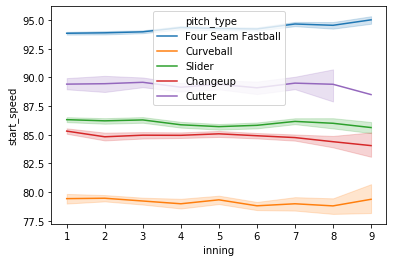

In [42]:
ax = sns.lineplot(x="inning", y="start_speed", hue="pitch_type", data=Max_Scherzer)
plt.savefig("Output/Max_scherzer's_speed.png")

# Justin Verlander

In [43]:
Justin_Verlander = final_df[final_df['Pitchers Name'] == 'Justin Verlander']
Justin_Verlander.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay,Batters Name,Pitchers Name
9574,-0.377,3.305,91.6,83.8,2583.231,208.232,38.0,3.6,23.7,-11.296,...,Mike Everitt,Tim Welke,Todd Tichenor,Tim Timmons,Fenway Park,"69 degrees, cloudy","7 mph, Out to CF",0,Mookie Betts,Justin Verlander
9575,0.196,1.430,90.9,83.3,2575.195,210.365,35.7,4.0,23.8,-11.907,...,Mike Everitt,Tim Welke,Todd Tichenor,Tim Timmons,Fenway Park,"69 degrees, cloudy","7 mph, Out to CF",0,Mookie Betts,Justin Verlander
9576,0.440,1.940,91.9,84.5,2629.031,213.821,39.9,4.1,23.8,-13.528,...,Mike Everitt,Tim Welke,Todd Tichenor,Tim Timmons,Fenway Park,"69 degrees, cloudy","7 mph, Out to CF",0,Mookie Betts,Justin Verlander
9577,-0.430,2.703,90.4,83.0,2335.886,212.849,32.7,4.3,23.8,-11.554,...,Mike Everitt,Tim Welke,Todd Tichenor,Tim Timmons,Fenway Park,"69 degrees, cloudy","7 mph, Out to CF",0,Brock Holt,Justin Verlander
9578,-0.450,3.012,79.3,73.8,1677.595,80.243,-21.2,11.0,23.9,13.253,...,Mike Everitt,Tim Welke,Todd Tichenor,Tim Timmons,Fenway Park,"69 degrees, cloudy","7 mph, Out to CF",0,Brock Holt,Justin Verlander


# Justin Verlander's pitching

In [44]:
Justin_Verlander['pitch_type'].value_counts() / len(Justin_Verlander) * 100

Four Seam Fastball    58.253184
Slider                17.260203
Curveball             14.998700
Changeup               9.383936
Intentional Ball       0.051989
Pitch Out              0.051989
Name: pitch_type, dtype: float64

# What happens mostly when justin verlander pitches?

In [45]:
Justin_Verlander['event'].value_counts() / len(Justin_Verlander) * 100

Strikeout           29.035612
Flyout              13.465038
Groundout           12.191318
Single              11.177541
Walk                 9.175981
Pop Out              8.786067
Lineout              4.652976
Double               3.925136
Home Run             2.313491
Grounded Into DP     1.221731
Forceout             0.857811
Sac Fly              0.779828
Triple               0.571874
Field Error          0.467897
Hit By Pitch         0.467897
Fielders Choice      0.207954
Strikeout - DP       0.155966
Double Play          0.155966
Sac Bunt             0.155966
Intent Walk          0.103977
Runner Out           0.077983
Bunt Pop Out         0.025994
Bunt Groundout       0.025994
Name: event, dtype: float64

# Relationship between pitching and event occurred

In [46]:
size = [20, 40, 60, 80, 100, 80, 60, 40, 20, 40]
data = [dict(
  type = 'scatter',
  x = Justin_Verlander['event'],
  y = Justin_Verlander['pitch_type'],
  mode='markers',
    marker=dict(
        size=size,
        sizemode='area',
        sizeref=2.*max(size)/(40.**2),
        sizemin=4
    ),
    transforms = [dict(
        type = 'groupby',
        groups = Justin_Verlander['pitch_type'],
   
  )]
)]

py.iplot({'data': data}, validate=False)

# Where does Justin verlander mostly piches on the plate?

In [47]:
trace0 = go.Scatter(
    x = Justin_Verlander.px[Justin_Verlander.pitch_type == 'Four Seam Fastball'],
    y = Justin_Verlander.pz[Justin_Verlander.pitch_type == 'Four Seam Fastball'],
    name = 'Four Seam FastBall',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgba(152, 0, 0, .8)'
        )
    )
)

trace1 = go.Scatter(
    x = Justin_Verlander.px[Justin_Verlander.pitch_type == 'Slider'],
    y = Justin_Verlander.pz[Justin_Verlander.pitch_type == 'Slider'],
    name = 'Slider',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(22, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgba(22, 0, 0, .8)'
        )
    )
)

trace2 = go.Scatter(
    x = Justin_Verlander.px[Justin_Verlander.pitch_type == 'Changeup'],
    y = Justin_Verlander.pz[Justin_Verlander.pitch_type == 'Changeup'],
    name = 'Changeup',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(224, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgba(224, 0, 0, .8)'
        )
    )
)

trace3 = go.Scatter(
    x = Justin_Verlander.px[Justin_Verlander.pitch_type == 'Curveball'],
    y = Justin_Verlander.pz[Justin_Verlander.pitch_type == 'Curveball'],
    name = 'Curveball',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(22, 1, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgba(22, 1, 0, .8)'
        )
    )
)

trace4 = go.Scatter(
    x = Justin_Verlander.px[Justin_Verlander.pitch_type == 'Cutter'],
    y = Justin_Verlander.pz[Justin_Verlander.pitch_type == 'Cutter'],
    name = 'Cutter',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(2, 1, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgba(2, 1, 0, .8)'
        )
    )
)

trace5 = go.Scatter(
    x = Justin_Verlander.px[Justin_Verlander.pitch_type == 'Two Seam Fastball'],
    y = Justin_Verlander.pz[Justin_Verlander.pitch_type == 'Two Seam Fastball'],
    name = 'Two Seam Fastball',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(222, 1, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgba(222, 1, 0, .8)'
        )
    )
)



data = [trace0, trace1,trace2, trace3, trace4, trace5]

layout = dict(title = 'Pitch types of Justin Verlander ',
              plot_bgcolor='rgb(50,205,50)',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

# Pitching speed as inning proceed

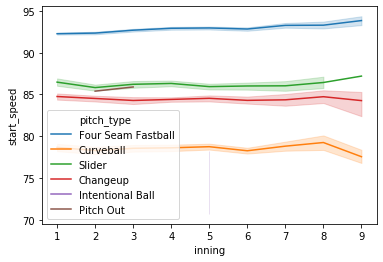

In [48]:
ax = sns.lineplot(x="inning", y="start_speed", hue="pitch_type", data=Justin_Verlander)
plt.savefig("Output/Justin_Verlander's_speed.png")

# Max vs Justin spin comparision

In [49]:
data = [
    go.Scatterpolargl(
      r = Justin_Verlander.pz,
      theta = Justin_Verlander.spin_dir,
      mode = "markers",
      name = "Justin Verlander",
      marker = dict(
        color = "rgb(27,158,119)",
        size = 15,
        line = dict(
          color = "white"
        ),
        opacity = 0.7
      )
    ),
    go.Scatterpolargl(
      r = Max_Scherzer.pz,
      theta = Max_Scherzer.spin_dir,
      mode = "markers",
      name = "Max Schrezer",
      marker = dict(
        color = "rgb(217,95,2)",
        size = 20,
        line = dict(
          color = "white"
        ),
        opacity = 0.7
      )
    ),
]

layout = go.Layout(
    title = "Justin Verlander vs Max Scherzer pitch spin",
    font = dict(
      size = 15
    ),
    showlegend = False,
    polar = dict(
      bgcolor = "rgb(223, 223, 223)",
      angularaxis = dict(
        tickwidth = 2,
        linewidth = 3,
        layer = "below traces"
      ),
      radialaxis = dict(
        side = "counterclockwise",
        showline = True,
        linewidth = 2,
        tickwidth = 2,
        gridcolor = "white",
        gridwidth = 2
      )
    ),
    paper_bgcolor = "rgb(223, 223, 223)"
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='polar-webgl')
plt.savefig("Output/Max_scherzer_vs_Justin_Verlander.png")

<Figure size 432x288 with 0 Axes>

# Top 2 Batters

# Joey Votto

In [50]:
Joey_Votto = final_df[final_df['Batters Name'] == 'Joey Votto']
Joey_Votto.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay,Batters Name,Pitchers Name
1140,1.356,1.473,85.9,80.3,1020.995,165.066,-8.0,6.3,23.9,2.278,...,Adam Hamari,Paul Schrieber,Fieldin Culbreth,Jim Reynolds,Great American Ball Park,"75 degrees, sunny","2 mph, Varies",0,Joey Votto,Kyle Hendricks
1141,-1.285,1.830,87.4,82.3,919.031,229.662,11.6,6.8,23.9,-6.179,...,Adam Hamari,Paul Schrieber,Fieldin Culbreth,Jim Reynolds,Great American Ball Park,"75 degrees, sunny","2 mph, Varies",0,Joey Votto,Kyle Hendricks
1142,-0.869,2.612,87.6,82.5,1042.884,236.184,14.3,6.8,23.9,-7.669,...,Adam Hamari,Paul Schrieber,Fieldin Culbreth,Jim Reynolds,Great American Ball Park,"75 degrees, sunny","2 mph, Varies",0,Joey Votto,Kyle Hendricks
1143,-0.690,0.524,86.9,82.8,872.749,237.882,11.5,7.1,24.0,-6.479,...,Adam Hamari,Paul Schrieber,Fieldin Culbreth,Jim Reynolds,Great American Ball Park,"75 degrees, sunny","2 mph, Varies",0,Joey Votto,Kyle Hendricks
1144,-1.762,2.255,86.9,82.4,973.365,238.908,13.9,7.0,24.0,-7.313,...,Adam Hamari,Paul Schrieber,Fieldin Culbreth,Jim Reynolds,Great American Ball Park,"75 degrees, sunny","2 mph, Varies",0,Joey Votto,Kyle Hendricks


# Joey Votto striking efficiency

In [51]:
Joey_Votto['code'].value_counts() / len(Joey_Votto) * 100

Ball                39.850476
Called Strike       17.693702
Foul                14.816493
In play out(s)       7.974626
Swinging Strike      7.385591
In play no out       3.579520
Ball in dirt         2.174898
In play runs         2.016312
Intentional Ball     1.880381
Foul Tip             0.928863
Blocked              0.339828
Foul Bunt            0.158586
Missed Bunt          0.022655
Pitch Out            0.022655
Name: code, dtype: float64

# Joey Votto batting events

In [52]:
Joey_Votto['event'].value_counts() / len(Joey_Votto) * 100

Strikeout              24.173086
Walk                   22.632533
Groundout              15.178976
Single                 13.026733
Flyout                  5.845039
Lineout                 5.052107
Double                  4.372451
Home Run                2.967830
Intent Walk             1.993657
Grounded Into DP        1.336656
Hit By Pitch            0.702311
Forceout                0.611690
Pop Out                 0.453104
Sac Fly                 0.339828
Field Error             0.294517
Strikeout - DP          0.271862
Runner Out              0.226552
Double Play             0.203897
Fielders Choice Out     0.181242
Bunt Groundout          0.090621
Triple                  0.045310
Name: event, dtype: float64

# Relationship between striking event and game event

In [53]:
size = [20, 40, 60, 80, 100, 80, 60, 40, 20, 40]
data = [dict(
  type = 'scatter',
  x = Joey_Votto['event'],
  y = Joey_Votto['code'],
  mode='markers',
    marker=dict(
        size=size,
        sizemode='area',
        sizeref=2.*max(size)/(40.**2),
        sizemin=4
    ),
    transforms = [dict(
        type = 'groupby',
        groups = Joey_Votto['code'],
   
  )]
)]

py.iplot({'data': data}, validate=False)

# How good joey performes as inning proceed?

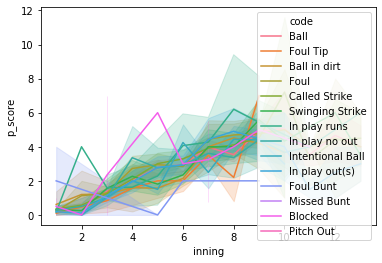

In [54]:
ax = sns.lineplot(x="inning", y="p_score", hue="code", data=Joey_Votto)
plt.savefig("Output/Joey_Votto_performes_inning.png")

# Joey votto's home run zone

In [55]:
trace1 = go.Scatter3d(
    x = Joey_Votto.x[Joey_Votto['event'] == 'Home Run'],
    y = Joey_Votto.y[Joey_Votto['event'] == 'Home Run'],
    z = Joey_Votto.z0[Joey_Votto['event'] == 'Home Run'],
    text = 'Home Run',
    mode = 'markers',
    marker = dict(
        sizemode = 'diameter',
        sizeref = 750, # info on sizeref: https://plot.ly/python/reference/#scatter-marker-sizeref
        color = random_colors(1000),
        )
)
data=[trace1]

layout=go.Layout(width=800, height=800, title = 'Joey Votto Home Run Zone',
              scene = dict(xaxis=dict(title='X axis',
                                      titlefont=dict(color='Orange')),
                            yaxis=dict(title='Y axis',
                                       titlefont=dict(color='rgb(220, 220, 220)')),
                            zaxis=dict(title='Z axis',
                                       titlefont=dict(color='rgb(220, 220, 220)')),
                            bgcolor = 'rgb(50,205,50)'
                           )
             )

fig=go.Figure(data=data, layout=layout)
py.iplot(fig, filename='solar_system_planet_size')

# Paul Goldschmidt

In [56]:
PaulGoldschmidt = final_df[final_df['Batters Name'] == 'Paul Goldschmidt']
PaulGoldschmidt.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay,Batters Name,Pitchers Name
2373,1.651,-0.460,83.9,78.1,1124.877,102.875,-18.2,8.9,23.9,9.262,...,Brian Knight,Larry Vanover,Ron Kulpa,Vic Carapazza,Chase Field,"79 degrees, roof closed","0 mph, None",0,Paul Goldschmidt,Jose Fernandez
2374,0.173,1.387,84.3,78.1,1809.776,84.013,-24.5,10.0,23.8,15.333,...,Brian Knight,Larry Vanover,Ron Kulpa,Vic Carapazza,Chase Field,"79 degrees, roof closed","0 mph, None",0,Paul Goldschmidt,Jose Fernandez
2375,-0.256,2.920,97.0,89.7,2367.939,211.968,38.1,3.5,23.8,-12.266,...,Brian Knight,Larry Vanover,Ron Kulpa,Vic Carapazza,Chase Field,"79 degrees, roof closed","0 mph, None",0,Paul Goldschmidt,Jose Fernandez
2472,-0.577,2.581,97.9,90.7,2382.541,202.819,33.7,2.8,23.8,-9.130,...,Brian Knight,Larry Vanover,Ron Kulpa,Vic Carapazza,Chase Field,"79 degrees, roof closed","0 mph, None",0,Paul Goldschmidt,Jose Fernandez
2536,0.051,1.647,95.7,87.8,2289.314,211.305,32.5,3.7,23.8,-11.473,...,Brian Knight,Larry Vanover,Ron Kulpa,Vic Carapazza,Chase Field,"79 degrees, roof closed","0 mph, None",0,Paul Goldschmidt,Jose Fernandez


# Paul Goldschmidt's striking efficiency

In [57]:
PaulGoldschmidt['code'].value_counts() / len(PaulGoldschmidt) * 100

Ball                37.429791
Called Strike       18.669962
Foul                14.154123
Swinging Strike      7.638733
In play out(s)       7.593799
In play no out       3.662098
Ball in dirt         2.943159
In play runs         2.830825
Intentional Ball     2.763424
Foul Tip             0.876208
Blocked              0.337003
Name: code, dtype: float64

# Paul Goldschmidt's batting events

In [58]:
PaulGoldschmidt['event'].value_counts() / len(PaulGoldschmidt) * 100

Strikeout               26.668164
Walk                    17.861155
Single                  13.120647
Groundout               12.087171
Flyout                   5.818917
Double                   4.583240
Lineout                  4.156369
Home Run                 3.459897
Intent Walk              3.414963
Pop Out                  2.606156
Grounded Into DP         1.729948
Forceout                 1.190744
Sac Fly                  0.966075
Field Error              0.561672
Strikeout - DP           0.516738
Hit By Pitch             0.404404
Triple                   0.381937
Catcher Interference     0.179735
Double Play              0.157268
Triple Play              0.067401
Runner Out               0.067401
Name: event, dtype: float64

# Relationship between striking event and game event of Paul

In [59]:
size = [20, 40, 60, 80, 100, 80, 60, 40, 20, 40]
data = [dict(
  type = 'scatter',
  x = PaulGoldschmidt['event'],
  y = PaulGoldschmidt['code'],
  mode='markers',
    marker=dict(
        size=size,
        sizemode='area',
        sizeref=2.*max(size)/(40.**2),
        sizemin=4
    ),
    transforms = [dict(
        type = 'groupby',
        groups = PaulGoldschmidt['code'],
   
  )]
)]

py.iplot({'data': data}, validate=False)

# How good paul performes as inning proceed?

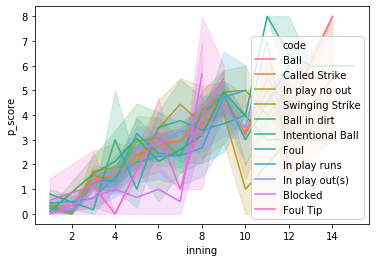

In [60]:
ax = sns.lineplot(x="inning", y="p_score", hue="code", data=PaulGoldschmidt)
plt.savefig("Output/Paul_Goldschmidt_performes_inning.png")

# Paul goldschmidt's home run zone

In [61]:
trace1 = go.Scatter3d(
    x = PaulGoldschmidt.x[PaulGoldschmidt['event'] == 'Home Run'],
    y = PaulGoldschmidt.y[PaulGoldschmidt['event'] == 'Home Run'],
    z = PaulGoldschmidt.z0[PaulGoldschmidt['event'] == 'Home Run'],
    text = 'Home Run',
    mode = 'markers',
    marker = dict(
        sizemode = 'diameter',
        sizeref = 750, # info on sizeref: https://plot.ly/python/reference/#scatter-marker-sizeref
        color = random_colors(1000),
        )
)
data=[trace1]

layout=go.Layout(width=800, height=800, title = 'Paul Goldschmidt Home Run Zone',
              scene = dict(xaxis=dict(title='X axis',
                                      titlefont=dict(color='Orange')),
                            yaxis=dict(title='Y axis',
                                       titlefont=dict(color='rgb(220, 220, 220)')),
                            zaxis=dict(title='Z axis',
                                       titlefont=dict(color='rgb(220, 220, 220)')),
                            bgcolor = 'rgb(50,205,50)'
                           )
             )

fig=go.Figure(data=data, layout=layout)
py.iplot(fig, filename='solar_system_planet_size')